### 2.** Adjusting data without tampering with signal

We simulated a dataset with 3 features (PreProcessing_ex2.csv), 2 continuous, one categorical; outliers were introduced to illustrate their effect on standardization and scaling. Summarise the information available in the data and assess the impact of the outliers.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv('PreProcessing_ex2.csv')

In [3]:
data

,feature_1,feature_2,feature_3
0,63.709584,117.414523,Red
1,44.353018,90.374923,Red
2,53.631284,113.119194,Blue
3,56.328626,122.954948,Yellow
4,100.000000,250.000000,Yellow
...,...,...,...
195,60.857749,127.198064,Blue
196,54.037749,110.285564,Yellow
197,55.864875,112.934832,Blue
198,68.152284,135.026531,Yellow


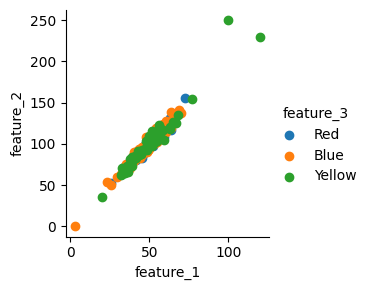

In [4]:
g = sns.FacetGrid(data, hue="feature_3") 
g = g.map(plt.scatter, "feature_1", "feature_2").add_legend()
plt.show()

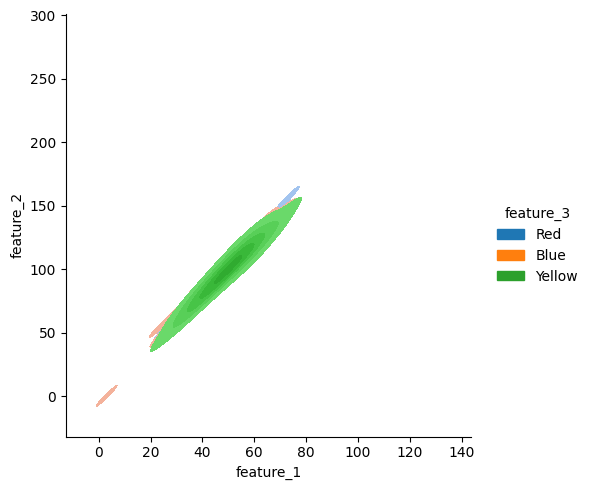

In [5]:
sns.displot(data, x="feature_1", y="feature_2",hue = "feature_3", kind="kde", fill=True)
plt.show()

In [6]:
def scaling (data, column_name):
    xmax = data[column_name].max()
    xmin = data[column_name].min()
    data[f"scaled_{column_name}"] = data[column_name].apply(lambda x: (x-xmin)/(xmax-xmin))

    return data

In [7]:
def standardization (data, column_name):
    mean = data[column_name].mean()
    std = data[column_name].std()
    data[f"standardized_{column_name}"] = data[column_name].apply(lambda x: (x-mean)/std)

    return data

In [8]:
data = scaling(data, "feature_1")
data = scaling(data, "feature_2")

In [9]:
data

,feature_1,feature_2,feature_3,scaled_feature_1,scaled_feature_2
0,63.709584,117.414523,Red,0.518885,0.469658
1,44.353018,90.374923,Red,0.353445,0.361500
2,53.631284,113.119194,Blue,0.432746,0.452477
3,56.328626,122.954948,Yellow,0.455800,0.491820
4,100.000000,250.000000,Yellow,0.829060,1.000000
...,...,...,...,...,...
195,60.857749,127.198064,Blue,0.494511,0.508792
196,54.037749,110.285564,Yellow,0.436220,0.441142
197,55.864875,112.934832,Blue,0.451837,0.451739
198,68.152284,135.026531,Yellow,0.556857,0.540106


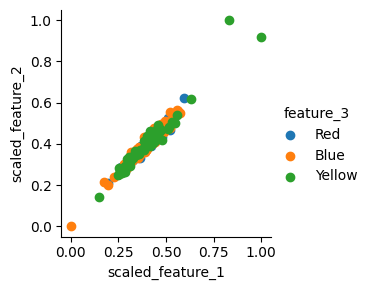

In [10]:
g_scale = sns.FacetGrid(data, hue="feature_3")
g_scale = g_scale.map(plt.scatter, "scaled_feature_1", "scaled_feature_2").add_legend()
plt.show()

In [11]:
data = standardization(data, "feature_1")
data = standardization(data, "feature_2")

In [12]:
data

,feature_1,feature_2,feature_3,scaled_feature_1,scaled_feature_2,standardized_feature_1,standardized_feature_2
0,63.709584,117.414523,Red,0.518885,0.469658,1.146753,0.677568
1,44.353018,90.374923,Red,0.353445,0.361500,-0.472879,-0.395115
2,53.631284,113.119194,Blue,0.432746,0.452477,0.303466,0.507168
3,56.328626,122.954948,Yellow,0.455800,0.491820,0.529162,0.897361
4,100.000000,250.000000,Yellow,0.829060,1.000000,4.183301,5.937340
...,...,...,...,...,...,...,...
195,60.857749,127.198064,Blue,0.494511,0.508792,0.908130,1.065689
196,54.037749,110.285564,Yellow,0.436220,0.441142,0.337476,0.394756
197,55.864875,112.934832,Blue,0.451837,0.451739,0.490358,0.499855
198,68.152284,135.026531,Yellow,0.556857,0.540106,1.518489,1.376250


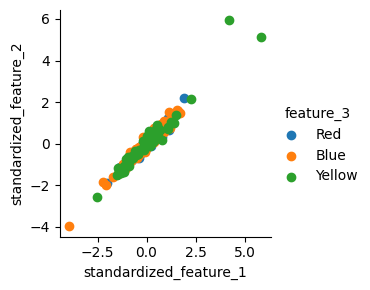

In [13]:
g_standard = sns.FacetGrid(data, hue="feature_3")
g_standard = g_standard.map(plt.scatter, "standardized_feature_1", "standardized_feature_2").add_legend()
plt.show()

In [14]:
### Remove Outliers
# This removes the outliers of x and y independently
def removeOutliers (data, column_name, threshold):
    data["outlier"] = False*len(data)
    for column in column_name:
        mean = data[column].mean()
        std = data[column].std()
        data["outlier"] = ((data["outlier"]) | (data[column] > (mean + threshold*std)) | (data[column] < (mean - threshold*std)))
    
    #data = data[data["outlier"] == False]
    return data

In [15]:
data_clean = removeOutliers(data, ["feature_1","feature_2"],2)

In [16]:
data_clean[data_clean["outlier"] == True]

,feature_1,feature_2,feature_3,scaled_feature_1,scaled_feature_2,standardized_feature_1,standardized_feature_2,outlier
4,100.000000,250.000000,Yellow,0.829060,1.000000,4.183301,5.937340,True
11,72.866454,155.917769,Red,0.597149,0.623671,1.912941,2.205022,True
17,23.435446,54.254829,Blue,0.174662,0.217019,-2.223127,-1.828028,True
18,25.595331,50.105510,Blue,0.193122,0.200422,-2.042402,-1.992635,True
38,25.857924,52.936976,Red,0.195367,0.211748,-2.020430,-1.880308,True
49,3.000000,0.000000,Blue,0.000000,0.000000,-3.933033,-3.980361,True
58,20.069099,35.050218,Yellow,0.145890,0.140201,-2.504801,-2.589890,True
99,120.000000,230.000000,Yellow,1.000000,0.920000,5.856771,5.143924,True
117,77.018910,154.854902,Yellow,0.632640,0.619420,2.260391,2.162858,True


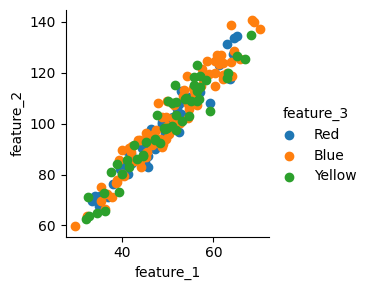

In [17]:
g = sns.FacetGrid(data_clean[data_clean["outlier"] == False], hue="feature_3")
g = g.map(plt.scatter, "feature_1", "feature_2").add_legend()
plt.show()